In [1]:
import pandas as pd  # Data manipulation and analysis  
import numpy as np  # Numerical operations  
import matplotlib.pyplot as plt  # Visualization  
import seaborn as sns  # Statistical graphics  

In [2]:
# Load the dataset
file_path = 'data/vgchartz-2024.csv'
df = pd.read_csv(file_path)

df.head()  # Shows the first 5 rows  

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [3]:
df.info()  # Summary of dataset (columns, data types, missing values)  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


## Data Information

The dataset contains **64,016** entries and **14 columns**. Key points:

- **6 columns** have numerical data (`float64`).
- **8 columns** are categorical (`object`).
- Missing data:
  - `critic_score`: 57,338 missing (89.5%)
  - `total_sales`: 45,094 missing (70.5%)
  - `na_sales`: 51,379 missing (59.3%)
  - `jp_sales`: 57,290 missing (89.5%)
  - `pal_sales`: 51,192 missing (59.5%)
  - `other_sales`: 48,888 missing (48.4%)
  - `developer`: 17 missing (0.03%)
  - `release_date`: 7,051 missing (11%)
  - `last_update`: 46,137 missing (72.2%)

Memory usage: **6.8+ MB**


In [4]:
df.describe()  # Statistical summary for numerical columns  

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


### Data Description - Key Insights:

1. **critic_score**:
   - Mean: 7.22 (high average ratings)
   - Min: 1.0 (possible data errors or extremely low ratings)
   - Max: 10.0 (perfect ratings for some games)
   - Std Dev: 1.46 (moderate variability in ratings)

2. **total_sales**:
   - Mean: 0.35 million copies (generally low sales)
   - Max: 20.32 million copies (indicating highly successful games)
   - Note: Skewed data with many low sales and a few high-selling games.

3. **na_sales (North America)**:
   - Mean: 0.26 million copies (dominant market in sales)
   - Max: 9.76 million copies (top games are very popular)
   - Std Dev: 0.49 (wide variability in regional sales)


4. **pal_sales (Europe and Africa)**:
   - Mean: 0.15 million copies (moderate sales in these regions)
   - Max: 9.85 million copies (indicating popular games in this market)

5. **other_sales (Other regions)**:
   - Mean: 0.04 million copies (lower sales compared to other regions)
   - Max: 3.12 million copies (few successful games)

### Possible Next Steps:
- **Normalization**: I will consider normalizing the data or applying log transformations, particularly for `total_sales`, to address its skewed distribution.
- **Outliers**: I will review and handle any outliers (such as extremely high sales) to ensure they don't distort my analysis.
- **Handling Missing Data**: I will address the missing values in columns like `total_sales` and `na_sales`, possibly using imputation or other methods to fill in these gaps.




### Missing Data Handling:
- **Columns to drop**:
  - `critic_score`: 89.5% missing
  - `jp_sales`: 89.5% missing
  - `last_update`: 72.2% missing
  - `img`: it just spoils the perception of the table
  - These columns will be dropped because their missing data percentage is too high and they are not essential for the main analysis (unless we decide to analyze game success based on critic scores).

In [5]:
# Drop unnecessary columns
if 'jp_sales' in df.columns and 'other_sales' in df.columns:
    df['other_sales'] += df['jp_sales']
df = df.drop(columns=['img','critic_score', 'jp_sales', 'last_update'])

# Check the shape of the dataframe after dropping columns
df.shape

(64016, 10)

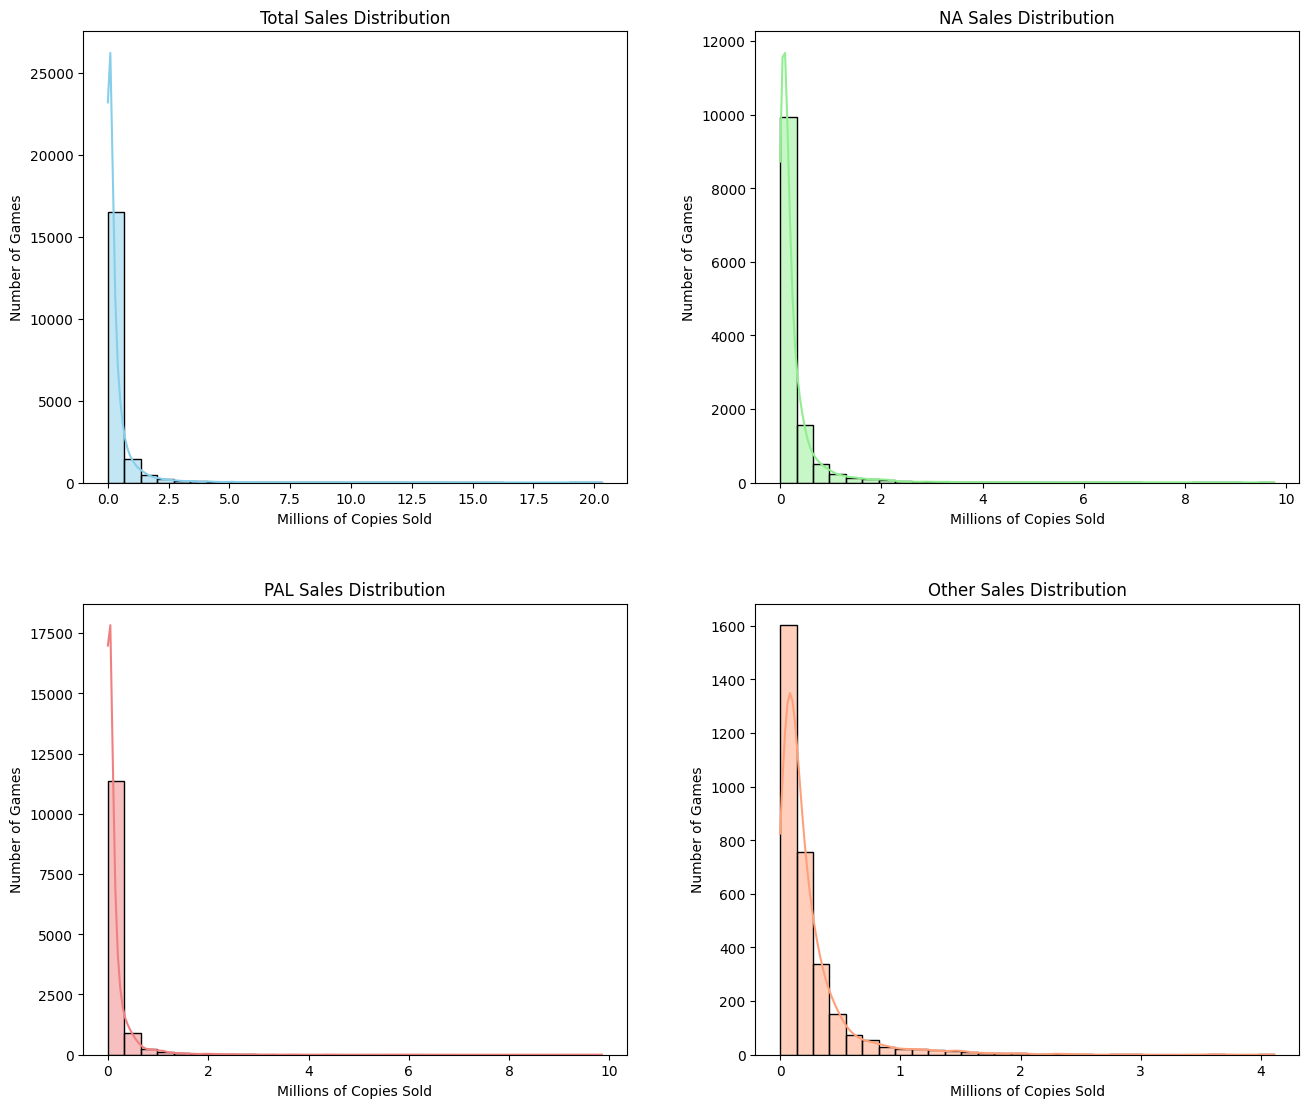

In [6]:
# List of sales columns
sales_columns = ['total_sales', 'na_sales', 'pal_sales', 'other_sales']
sales_titles = ['Total Sales', 'NA Sales', 'PAL Sales', 'Other Sales']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']  # Different colors for each plot

# Create subplots for the distributions with adjusted spacing
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Loop through each sales column and create a distribution plot
for i, ax in enumerate(axes.flatten()):
    sns.histplot(df[sales_columns[i]], bins=30, kde=True, ax=ax, color=colors[i])
    ax.set_title(f'{sales_titles[i]} Distribution')
    ax.set_xlabel('Millions of Copies Sold')  # Label for X-axis
    ax.set_ylabel('Number of Games')  # Label for Y-axis

# Adjust layout to prevent overlap and increase space between plots
plt.tight_layout(pad=4.0)  # pad increases the space between plots
plt.show()

### Analysis of Sales Distributions

- The distributions of `total_sales`, `na_sales`, `pal_sales`, and `other_sales` are **highly skewed to the left**, meaning the majority of games have very low sales.
- The **KDE curve is higher than the histogram bars at the beginning**, indicating an overwhelming number of games with minimal sales.
- A **few games have exceptionally high sales**, creating a long tail in the distribution.
- This suggests that **most games perform poorly in sales, while a small number become massive hits**.
- Given this distribution, it makes sense to **analyze top-selling games separately**, as they represent a distinct group in the dataset.


In [7]:
def get_top_games(data, quantile_threshold, sales_col='total_sales'):
    """
    Filters the input dataframe to return top games based on the specified quantile of sales.
    
    Parameters:
        data (DataFrame): The input dataframe containing sales data.
        quantile_threshold (float): The quantile threshold (between 0 and 1) to filter the top games.
        sales_col (str): The column name representing sales data. Default is 'total_sales'.
    
    Returns:
        top_games (DataFrame): A dataframe containing games with sales >= the computed threshold.
    """
    # Calculate the quantile threshold for the specified sales column
    threshold = data[sales_col].quantile(quantile_threshold)
    
    # Filter the dataframe to get top games based on the computed threshold
    top_games = data[data[sales_col] >= threshold]
    
    # Print the threshold and the number of top games
    print(f"Top games start with {sales_col} > {threshold:.2f} million (quantile: {quantile_threshold}).")
    print(f"Number of top games: {len(top_games)}")
    
    return top_games

# Example usage:
# Here, quantile_threshold must be provided (e.g., 0.9 for the 90th percentile)
top_games_raw = get_top_games(df, 0.9)
top_games_raw.head()

Top games start with total_sales > 0.83 million (quantile: 0.9).
Number of top games: 1907


,title,console,genre,publisher,developer,total_sales,na_sales,pal_sales,other_sales,release_date
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,20.32,6.37,9.85,4.11,2013-09-17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,19.39,6.06,9.71,3.62,2014-11-18
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,16.15,8.41,5.49,2.25,2002-10-28
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,15.86,9.06,5.33,1.48,2013-09-17
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,15.09,6.18,6.05,2.85,2015-11-06


### Data Aggregation for Enhanced Sales Analysis

At this stage, we observe that the dataset contains multiple entries for the same game, each corresponding to a different console. This redundancy can lead to inaccurate analysis of overall game performance.

To address this, we will:
- **Aggregate Sales Data:** Combine sales figures (e.g., `total_sales`, `na_sales`, `pal_sales`, `other_sales`) for the same game across all consoles.
- **Consolidate Console Information:** Merge the `console` entries into a single field, listing all consoles where the game is sold.
- **Retain Key Attributes:** Keep other relevant columns (such as `genre`, `publisher`, `developer`) from the original dataset, and choose the earliest `release_date` as the representative date for the game.

This consolidation will yield a more accurate view of each game's overall performance, allowing us to better evaluate sales results.

In [8]:
# Define a helper function to aggregate and clean the console entries
def aggregate_consoles(series):
    unique_consoles = set()
    for entry in series.dropna():
        # Split the string by comma if there are multiple consoles
        for console in entry.split(','):
            c = console.strip()  # Remove extra spaces
            # Exclude entries like 'All'
            if c.lower() != 'all' and c:
                unique_consoles.add(c)
    return ', '.join(sorted(unique_consoles))

# Group by game title, aggregate sales by summing them, 
# and take the first value for genre, publisher, developer (assuming they're the same),
# and the earliest release_date.
aggregated_games = df.groupby('title', as_index=False).agg(
    total_sales=('total_sales', 'sum'),
    na_sales=('na_sales', 'sum'),
    pal_sales=('pal_sales', 'sum'),
    other_sales=('other_sales', 'sum'),
    console=('console', aggregate_consoles),
    genre=('genre', 'first'),
    publisher=('publisher', 'first'),
    developer=('developer', 'first'),
    release_date=('release_date', lambda x: x.dropna().min())
)

# Sort the aggregated dataframe by total_sales in descending order and reset index
aggregated_games = aggregated_games.sort_values('total_sales', ascending=False).reset_index(drop=True)
aggregated_games.index += 1

ag_df = aggregated_games

# Display the top 20 aggregated games
ag_df.head(20)

,title,total_sales,na_sales,pal_sales,other_sales,console,genre,publisher,developer,release_date
1,Grand Theft Auto V,64.29,26.19,28.14,9.98,"PC, PS3, PS4, PS5, X360, XOne, XS",Action,Rockstar Games,Rockstar North,2013-09-17
2,Call of Duty: Black Ops,30.99,17.65,9.45,3.51,"DS, PC, PS3, PSN, Wii, X360, XBL",Shooter,Activision,Treyarch,2010-11-09
3,Call of Duty: Modern Warfare 3,30.71,15.57,11.26,3.49,"PC, PS3, Wii, X360",Shooter,Activision,Infinity Ward,2011-11-08
4,Call of Duty: Black Ops II,29.59,14.12,11.08,4.20,"PC, PS3, WiiU, X360",Shooter,Activision,Treyarch,2012-11-13
5,Call of Duty: Ghosts,28.80,15.06,9.60,3.81,"PC, PS3, PS4, WiiU, X360, XOne",Shooter,Activision,Infinity Ward,2013-11-05
6,Call of Duty: Black Ops 3,26.72,12.82,9.76,3.92,"PC, PS3, PS4, X360, XOne",Shooter,Activision,Treyarch,2015-11-06
7,Call of Duty: Modern Warfare 2,25.02,13.54,8.08,3.33,"PC, PS3, PSN, X360, XBL",Shooter,Activision,Infinity Ward,2009-11-10
8,Minecraft,24.01,9.07,9.48,3.94,"3DS, And, NS, PC, PS3, PS4, PSV, Series, WiiU,...",Misc,Sony Computer Entertainment,Mojang,2010-05-10
9,Grand Theft Auto IV,22.53,11.60,7.64,3.24,"PC, PS3, X360, XBL",Action,Rockstar Games,Rockstar North,2008-04-29
10,Call of Duty: Advanced Warfare,21.78,10.66,7.99,3.13,"PC, PS3, PS4, X360, XOne",Shooter,Activision,Sledgehammer Games,2014-11-04


### Conclusion for Aggregated Data Summary

By grouping the dataset by game title and summing the sales figures across all platforms, we have consolidated duplicate entries and achieved a more accurate representation of each game's overall sales performance. The aggregated dataframe now contains **39,798** rows (down from 64,000), ensuring that each game is represented only once with its total sales data.

In [9]:
non_zero_sales = ag_df[ag_df['total_sales'] > 0]
non_zero_sales['total_sales'].describe() # I need to get rid of zero sales to find the average 'total_sales'

count    12039.000000
mean         0.548709
std          1.577087
min          0.010000
25%          0.050000
50%          0.150000
75%          0.450000
max         64.290000
Name: total_sales, dtype: float64

In [10]:
# Calculate the 90th percentile for total_sales after group by game title
top_aggregated_games = get_top_games(ag_df, 0.9)

Top games start with total_sales > 0.30 million (quantile: 0.9).
Number of top games: 4064


In [11]:
# Calculate the 97th percentile for total_sales after group by game title
top_aggregated_games = get_top_games(ag_df, 0.963)

Top games start with total_sales > 1.01 million (quantile: 0.963).
Number of top games: 1477


### Quantile Threshold Justification for Top Games

- When using a 0.90 quantile, the threshold is approximately **0.30 million** in total sales, which is below the average of **0.55 million** for games with non-zero sales.
- In contrast, setting the threshold at the 0.963 quantile results in a cutoff of about **1.01 million** in total sales, which more accurately captures the truly top-performing games.
- With this 0.97 threshold, out of **12,039** aggregated games, only **1,477** are classified as top games, representing the elite group with outstanding sales.


In [12]:
ordinary_non_zero_games = non_zero_sales[non_zero_sales['total_sales'] < 1.01]
ordinary_non_zero_games.describe()

,total_sales,na_sales,pal_sales,other_sales
count,10562.000000,10562.000000,10562.000000,10562.000000
mean,0.203723,0.096858,0.043120,0.027355
std,0.225512,0.142486,0.080395,0.084948
min,0.010000,0.000000,0.000000,0.000000
25%,0.040000,0.000000,0.000000,0.000000
50%,0.110000,0.040000,0.010000,0.000000
75%,0.290000,0.140000,0.050000,0.000000
max,1.000000,0.930000,0.900000,0.960000


Median total_sales: 0.11
Frequency counts for total_sales:
 total_sales
0.01    953
0.02    867
0.03    642
0.04    508
0.05    459
       ... 
0.97     13
0.97      1
0.98     15
0.99     12
1.00     18
Name: count, Length: 169, dtype: int64
Number of games with total_sales between 0.09 and 0.13: 1245


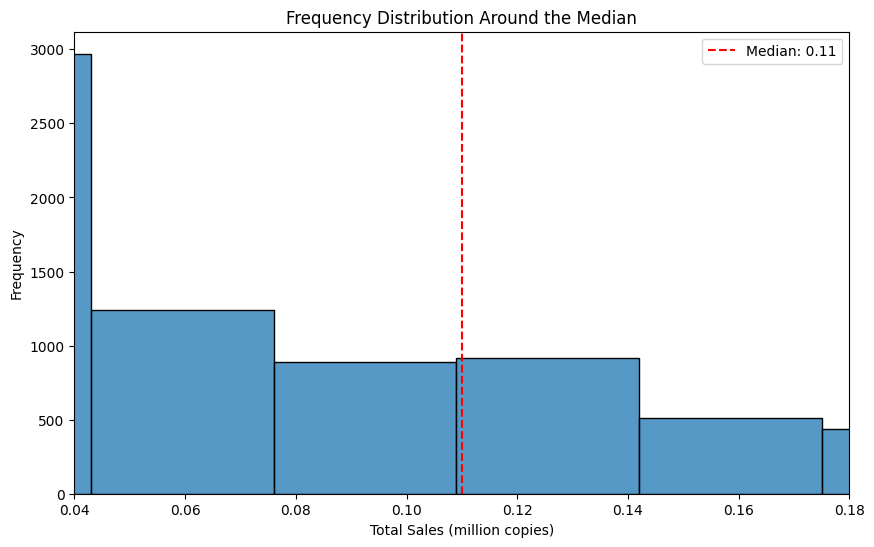

In [13]:
# Calculate the median for ordinary games (non-top games)
median_val = ordinary_non_zero_games['total_sales'].median()
print("Median total_sales:", median_val)

# Calculate frequency counts for total_sales in ordinary games
sales_counts = ordinary_non_zero_games['total_sales'].value_counts().sort_index()
print("Frequency counts for total_sales:\n", sales_counts)

# Define an interval around the median (for example, ±0.02)
lower_bound = median_val - 0.02
upper_bound = median_val + 0.02
freq_range = ordinary_non_zero_games[(ordinary_non_zero_games['total_sales'] >= lower_bound) & (ordinary_non_zero_games['total_sales'] <= upper_bound)]
print(f"Number of games with total_sales between {lower_bound:.2f} and {upper_bound:.2f}: {len(freq_range)}")

# Plot a histogram focused on the interval around the median
plt.figure(figsize=(10,6))
sns.histplot(ordinary_non_zero_games['total_sales'], bins=30, kde=False)
plt.axvline(median_val, color='red', linestyle='--', label=f'Median: {median_val:.2f}')
plt.xlim(lower_bound - 0.05, upper_bound + 0.05)
plt.xlabel("Total Sales (million copies)")
plt.ylabel("Frequency")
plt.title("Frequency Distribution Around the Median")
plt.legend()
plt.show()

### Analyzing Sales Distribution Around the Median

In this block, we examine the distribution of `total_sales` for ordinary (non-top) games by:

- **Calculating the Median:**  
  We compute the median of nonzero sales to get a robust central value less affected by outliers.

- **Checking Frequency Counts:**  
  We review the frequency counts of sales values to understand how often certain numbers occur.

- **Defining an Interval Around the Median:**  
  By setting an interval (±0.02 million) around the median, we quantify how concentrated the data is near this central value.

- **Visualizing the Distribution:**  
  A histogram focused on this interval—with a vertical line marking the median—allows us to visually assess the density of games around the median.

This focused analysis helps us understand the typical sales performance of ordinary games, ensuring that any further data imputation or analysis preserves the natural distribution.

In [14]:
ordinary_games = ag_df[ag_df['total_sales'] < 1.01]
ordinary_games.shape

(38321, 10)

In [15]:
# Extract sorted nonzero total_sales from ordinary_non_zero_games (only values > 0)
nonzero_total_sales = np.sort(ordinary_non_zero_games['total_sales'][ordinary_non_zero_games['total_sales'] > 0].values)
N = len(nonzero_total_sales)
# p: empirical probability for each value: 1/N, 2/N, ..., 1
p = np.arange(1, N+1) / N

# Set upper bound as the 85th percentile of nonzero_total_sales
upper_bound = np.percentile(nonzero_total_sales, 85)
print(f"Upper bound for imputed values (85th percentile): {upper_bound:.2f}")

# Identify the indices in ordinary_games where total_sales is 0
zero_indices = ordinary_games.index[ordinary_games['total_sales'] == 0].tolist()
n_zeros = len(zero_indices)
print(f"Number of zeros to impute: {n_zeros}")

# For each zero, generate a random quantile u and obtain the corresponding value via interpolation
imputed_values = []
for _ in zero_indices:
    u = np.random.uniform(0, 1)
    x = np.interp(u, p, nonzero_total_sales)  # interpolation: value at quantile u
    # Enforce the upper bound: if x is greater than upper_bound, use upper_bound instead.
    imputed_values.append(min(x, upper_bound))

# Replace zero values with the imputed values
ordinary_games.loc[zero_indices, 'total_sales'] = imputed_values

# Check updated descriptive statistics for total_sales in ordinary_games
print("After quantile mapping imputation with upper bound for 'total_sales':")
print(ordinary_games['total_sales'].describe())


Upper bound for imputed values (85th percentile): 0.44
Number of zeros to impute: 27759
After quantile mapping imputation with upper bound for 'total_sales':
count    38321.000000
mean         0.180470
std          0.177158
min          0.010000
25%          0.040000
50%          0.110000
75%          0.290000
max          1.000000
Name: total_sales, dtype: float64


### Correlation Analysis After Filling Zero Values in Total Sales

Now that we have imputed missing total sales values in **ordinary_games**, we need to check how much the correlations between genres and sales have changed.
This will help determine whether the imputed values significantly impact the relationships in our dataset.


In [16]:
# Check if there are missing values in the 'genre' column
missing_genres = df['genre'].isnull().sum()
print(f"Missing values in 'genre': {missing_genres}")

# Verify that 'genre' has no missing data before using it for correlation analysis
if missing_genres == 0:
    print("✅ 'genre' has no missing values. Safe to use for correlation analysis.")
else:
    print("⚠️ 'genre' contains missing values. Consider handling them before analysis.")

Missing values in 'genre': 0
✅ 'genre' has no missing values. Safe to use for correlation analysis.


In [17]:
# One-Hot Encoding for genres
genre_dummies_non_zero = pd.get_dummies(ordinary_non_zero_games['genre'], prefix="Genre")
genre_dummies_all = pd.get_dummies(ordinary_games['genre'], prefix="Genre")

# Add sales columns to the encoded data
sales_columns = ['total_sales']
genre_dummies_non_zero[sales_columns] = ordinary_non_zero_games[sales_columns]
genre_dummies_all[sales_columns] = ordinary_games[sales_columns]

# Compute correlation matrices
correlation_non_zero = genre_dummies_non_zero.corr()
correlation_all = genre_dummies_all.corr()

# Compute the difference between correlation matrices
correlation_diff = correlation_all[sales_columns] - correlation_non_zero[sales_columns]


Maximum absolute differences in correlation:
{'total_sales': 0.08644284182575576}


<Figure size 1200x600 with 0 Axes>

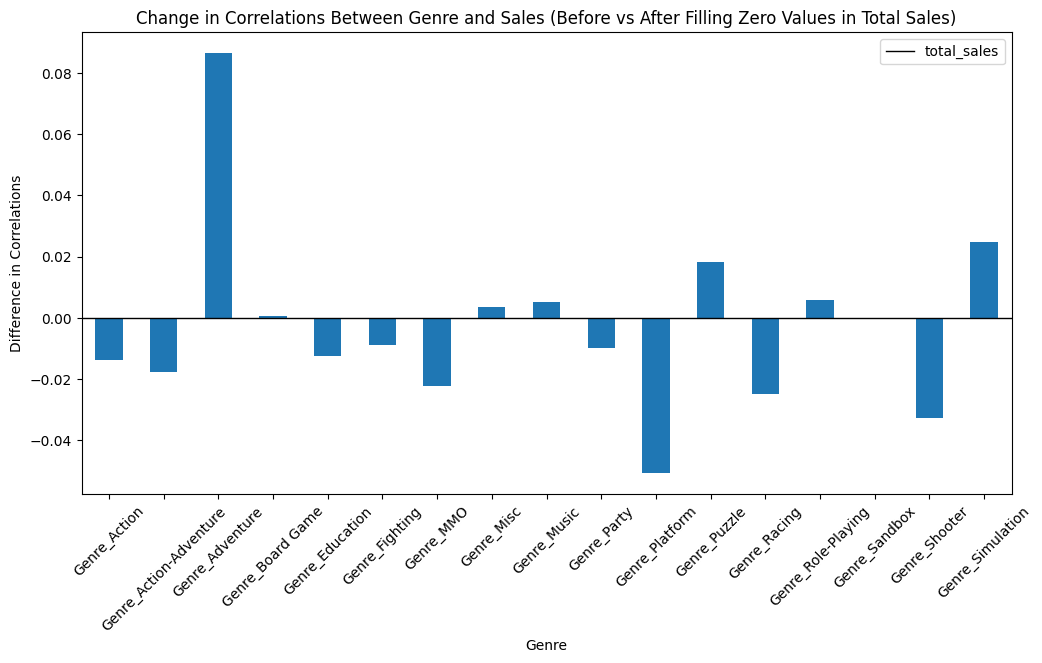

In [18]:
# Change in correlations by genre
# Difference in correlations between genres and sales
correlation_change = correlation_all[sales_columns] - correlation_non_zero[sales_columns]
correlation_change = correlation_change.iloc[:-4]  # Exclude columns with sales

# Analyze maximum differences
correlation_diff_stats = correlation_diff.abs().max().to_dict()
print("Maximum absolute differences in correlation:")
print(correlation_diff_stats)

# Visualization of the difference in correlation by genre
plt.figure(figsize=(12, 6))
correlation_change.plot(kind='bar', figsize=(12, 6))
plt.title("Change in Correlations Between Genre and Sales (Before vs After Filling Zero Values in Total Sales)")
plt.ylabel("Difference in Correlations")
plt.xlabel("Genre")
plt.axhline(0, color='black', linewidth=1)  # Line at level 0 for reference
plt.legend(sales_columns)
plt.xticks(rotation=45)
plt.show()


### Final Imputation Results for Ordinary Games

- **Dataset Overview:**
  - **Ordinary Non-Zero Games:** 10,562 games (original data with nonzero total_sales)
  - **Ordinary Games (with zeros):** 38,321 games  
    After imputation, all zero total_sales values have been replaced.

- **Descriptive Statistics After Imputation (total_sales):**
  - **Mean:** 0.180514 million copies (circa)
  - **Standard Deviation:** 0.176654 (circa)
  - **Minimum:** 0.010 million copies  
  - **25th Percentile:** 0.040 million copies  
  - **Median (50th Percentile):** 0.110 million copies  
  - **75th Percentile:** 0.290 million copies  
  - **Maximum:** 1.000 million copies  

- **Impact of Imputation on Correlations:**

  - A key question when filling in missing sales values is whether it distorts the relationships between **genres and sales**.  
  To evaluate this, we compared the correlation matrices **before and after imputation**. 
  - Maximum absolute differences in correlations is approximately 8%, which is a good indicator.

### Conclusion

While my approach using quantile mapping (or sampling imputation) for replacing zeros in total_sales has managed to "rescue" the dataset—yielding descriptive statistics that match those of the nonzero data—it is important to note that this method is far from ideal. Imputing missing values with randomly generated values does not necessarily capture the true variability and underlying patterns in the data. 

This solution serves as a basic, training-level method for handling missing data without resorting to more advanced machine learning techniques. For more accurate and robust imputations, especially in a production environment, methods such as regression-based imputation or kNN imputation should be considered.


In [19]:
def check_zero_values(dataset, columns_to_check=None, dataset_name="dataset"):
    """
    Prints the number of zero values for each specified column in the dataset,
    along with the total number of rows, and includes the provided dataset name in the output.

    Parameters:
        dataset (DataFrame): The input DataFrame to check.
        columns_to_check (list, optional): List of column names to check.
            If None, defaults to ['total_sales', 'na_sales', 'pal_sales', 'other_sales'].
        dataset_name (str): Name of the dataset (for display purposes).
    """
    if columns_to_check is None:
        columns_to_check = ['total_sales', 'na_sales', 'pal_sales', 'other_sales']
    
    total_rows = dataset.shape[0]
    print(f"Zero values in {dataset_name}:")
    for col in columns_to_check:
        if col in dataset.columns:
            zeros = (dataset[col] == 0).sum()
            print(f"{col}: {zeros} out of {total_rows} rows")
        else:
            print(f"{col}: Column not found in {dataset_name}")

# Example usage:
check_zero_values(ordinary_games, dataset_name="ordinary_games")

Zero values in ordinary_games:
total_sales: 0 out of 38321 rows
na_sales: 31930 out of 38321 rows
pal_sales: 33021 out of 38321 rows
other_sales: 36507 out of 38321 rows


In [20]:
check_zero_values(top_aggregated_games, dataset_name="top_aggregated_games")

Zero values in top_aggregated_games:
total_sales: 0 out of 1477 rows
na_sales: 42 out of 1477 rows
pal_sales: 49 out of 1477 rows
other_sales: 800 out of 1477 rows


### Consistency Check of Sales Data

In this block, we verify the consistency of our sales data in the `ordinary_games` DataFrame by comparing the `total_sales` with the sum of the regional sales columns (`na_sales`, `pal_sales`, and `other_sales`). The assumption is that the total sales for each game should equal the sum of its regional sales. 

The code performs the following steps:
- **Compute Regional Sum:**  
  For each game, a new column `regional_sum` is created as the sum of `na_sales`, `pal_sales`, and `other_sales`.
  
- **Identify Inconsistencies:**  
  The code then filters the rows where the absolute difference between `total_sales` and `regional_sum` exceeds a small tolerance (1e-6), which helps account for potential rounding errors.
  
- **Output:**  
  Finally, it prints the number of inconsistent entries along with a preview (first few rows) of these entries, displaying the game title, `total_sales`, and `regional_sum`.

This check helps ensure that the regional sales data is complete and consistent with the overall total sales.


In [21]:
# Create a copy of ordinary_games to avoid SettingWithCopyWarning
ordinary_games_copy = ordinary_games.copy()

# Calculate the sum of regional sales for each game using .loc
ordinary_games_copy.loc[:, 'regional_sum'] = (
    ordinary_games_copy['na_sales'] +
    ordinary_games_copy['pal_sales'] +
    ordinary_games_copy['other_sales']
)

# Define a small tolerance to account for floating-point errors
tolerance = 1e-6

# Identify entries where the sum of regional sales differs from total_sales beyond the tolerance
inconsistent_entries = ordinary_games_copy[
    np.abs(ordinary_games_copy['regional_sum'] - ordinary_games_copy['total_sales']) > tolerance
]

print("Number of inconsistent entries:", len(inconsistent_entries))
inconsistent_entries[['title', 'total_sales', 'regional_sum']].head()

Number of inconsistent entries: 35374


,title,total_sales,regional_sum
1478,Jampack Winter 2000,1.0,0.93
1481,1942,1.0,0.79
1482,Jeremy McGrath Supercross 2000,1.0,0.96
1483,CSI: Hard Evidence,1.0,0.89
1484,The Adventures of Tintin: The Game,1.0,0.84


### Regional Sales Adjustment and Verification Functions

These functions are designed to ensure that, for each game in the dataset, the sum of the regional sales  
(`na_sales`, `pal_sales`, and `other_sales`) exactly equals the `total_sales` value. This is critical for  
data consistency and further analysis.

---

#### `adjust_regional_sales`

**Purpose:**  
This function adjusts the regional sales values for a single row so that their sum equals `total_sales`.  
It handles several cases depending on how many regional values are nonzero:

- **Case 1: All three regional values are nonzero (nonzero_count == 3)**
  - The function calculates the difference:
    ```
    diff = total_sales - (na_sales + pal_sales + other_sales)
    ```
  - Then, each regional value is adjusted proportionally:
    ```
    new_value = old_value + (old_value / (na_sales + pal_sales + other_sales)) * diff
    ```
  - This preserves the relative proportions of the three regions while ensuring the total matches.

- **Case 2: Exactly two regional values are nonzero (nonzero_count == 2)**
  - The missing (zero) value is imputed directly as:
    ```
    missing_value = total_sales - (sum of the two nonzero regional values)
    ```
  
- **Case 3: Fewer than 2 regional values are nonzero (i.e., only one or none are nonzero)**
  - The function then uses average regional proportions to impute the missing values.
  - If the parameter `avg_props` is not provided, it is computed automatically from a global reference dataset (e.g., `ordinary_non_zero_games`) that contains rows with complete (nonzero) regional sales.
  - Each missing regional value is imputed as:
    ```
    imputed_value = total_sales * avg_prop
    ```
  - After imputation, the regional values are scaled so that their sum exactly equals `total_sales`.

**Function Signature:**

```python
def adjust_regional_sales(row, tol=1e-6, avg_props=None):
    ...



In [22]:
def adjust_regional_sales(row, tol=1e-6, avg_props=None):
    """
    Adjusts regional sales so that their sum equals total_sales.
    
    For rows with sufficient nonzero values, it adjusts proportionally or imputes missing ones.
    For rows with fewer than 2 nonzero values, it imputes missing values using avg_props.
    
    Parameters:
        row (Series): A row from the DataFrame.
        tol (float): Tolerance for adjustments.
        avg_props (dict, optional): Average regional proportions.
    
    Returns:
        Series: The adjusted row.
    """
    T = row['total_sales']
    A = row['na_sales']
    B = row['pal_sales']
    C = row['other_sales']
    
    current_sum = A + B + C
    diff = T - current_sum
    
    # If the difference is negligible, do nothing.
    if abs(diff) < tol:
        return row
    
    # Count the number of regional values > 0.
    regions = {'na_sales': A, 'pal_sales': B, 'other_sales': C}
    nonzero_count = sum(1 for x in regions.values() if x > 0)
    
    if nonzero_count == 3:
        # All three are nonzero, adjust proportionally.
        row['na_sales'] = A + (A / current_sum) * diff
        row['pal_sales'] = B + (B / current_sum) * diff
        row['other_sales'] = C + (C / current_sum) * diff
    elif nonzero_count == 2:
        # Exactly one value is zero, impute it directly.
        if A == 0:
            row['na_sales'] = T - (B + C)
        elif B == 0:
            row['pal_sales'] = T - (A + C)
        elif C == 0:
            row['other_sales'] = T - (A + B)
    else:
        # nonzero_count == 0 or 1: use avg_props to impute missing values.
        # If avg_props is not passed, we calculate it from the global dataset
        if avg_props is None:
            global ordinary_non_zero_games
            ds = ordinary_non_zero_games.copy()
            ds['regional_total'] = ds['na_sales'] + ds['pal_sales'] + ds['other_sales']
            valid = ds['regional_total'] > 0
            avg_na = (ds.loc[valid, 'na_sales'] / ds.loc[valid, 'regional_total']).mean()
            avg_pal = (ds.loc[valid, 'pal_sales'] / ds.loc[valid, 'regional_total']).mean()
            avg_other = (ds.loc[valid, 'other_sales'] / ds.loc[valid, 'regional_total']).mean()
            avg_props = {'na_sales': avg_na, 'pal_sales': avg_pal, 'other_sales': avg_other}
        
        if nonzero_count == 0:
            # All three are zero.
            row['na_sales'] = T * avg_props.get('na_sales', 0)
            row['pal_sales'] = T * avg_props.get('pal_sales', 0)
            row['other_sales'] = T * avg_props.get('other_sales', 0)
        elif nonzero_count == 1:
            # Only one is nonzero; preserve it and impute the missing ones proportionally.
            known_cols = [col for col, val in regions.items() if val > 0]
            missing_cols = [col for col in regions if regions[col] == 0]
            known_value = row[known_cols[0]]
            # Distribute the remaining amount (T - known_value) among missing columns
            sum_missing_props = sum(avg_props[col] for col in missing_cols)
            for col in missing_cols:
                row[col] = (T - known_value) * (avg_props[col] / sum_missing_props)
        # After imputation, scale the regional values to ensure their sum equals T.
        new_sum = row['na_sales'] + row['pal_sales'] + row['other_sales']
        if new_sum > 0:
            scaling_factor = T / new_sum
            row['na_sales'] *= scaling_factor
            row['pal_sales'] *= scaling_factor
            row['other_sales'] *= scaling_factor
    
    return row


def verify_regional_sales(dataset, tol=1e-6, dataset_name='dataset'):
    """
    Computes a new column 'regional_sum' as the sum of 'na_sales', 'pal_sales', and 'other_sales'
    for each row in the dataset. Then, it checks for inconsistencies where the absolute difference
    between regional_sum and total_sales exceeds the specified tolerance and prints the number of such rows.
    Finally, it displays the first 10 rows for verification.

    Parameters:
        dataset (DataFrame): The DataFrame containing sales data.
        tol (float): Tolerance for inconsistency (default is 1e-6).

    Returns:
        DataFrame: The input DataFrame with an additional 'regional_sum' column.
    """
    ds = dataset.copy()
    
    # Compute the sum of regional sales for each row.
    ds['regional_sum'] = ds['na_sales'] + ds['pal_sales'] + ds['other_sales']
    
    # Identify rows where the sum of regional sales differs from total_sales beyond the tolerance.
    inconsistent_rows = ds[np.abs(ds['regional_sum'] - ds['total_sales']) > tol]
    print(f"Number of rows in {dataset_name} where regional_sum does not equal total_sales: {len(inconsistent_rows)}")
    
    # Display the first 10 rows for verification.
    print("After adjustment:")

    
    return ds.drop(columns=['regional_sum'])

In [23]:
# Apply the adjustment row-wise in 'ordinaly_games'
ordinary_games_adj = ordinary_games.apply(adjust_regional_sales, axis=1)
verify_regional_sales(ordinary_games_adj, dataset_name='ordinary_games_adj')

Number of rows in ordinary_games_adj where regional_sum does not equal total_sales: 0
After adjustment:


,title,total_sales,na_sales,pal_sales,other_sales,console,genre,publisher,developer,release_date
1478,Jampack Winter 2000,1.00,0.550000,0.380000,0.070000,PS,Misc,Sony Computer Entertainment,Sony Computer Entertainment America,2000-11-07
1479,Excitebike 64,1.00,0.650000,0.150000,0.200000,"N64, iQue",Racing,Nintendo,Left Field Productions,2000-04-30
1480,Pro Evolution Soccer 2018,1.00,0.210000,0.470000,0.320000,"PC, PS3, PS4, X360, XOne",Sports,Konami Digital Entertainment,Konami Digital Entertainment,2017-09-12
1481,1942,1.00,0.650000,0.140000,0.210000,"GB, NES, Series",Shooter,Capcom,Capcom,1984-12-01
1482,Jeremy McGrath Supercross 2000,1.00,0.630000,0.330000,0.040000,"DC, GB, N64, PS",Racing,Acclaim Entertainment,Acclaim Entertainment,1999-09-29
...,...,...,...,...,...,...,...,...,...,...
39794,yOm,0.05,0.029610,0.013686,0.006704,XBL,Action,Microsoft,jojito,2009-10-21
39795,yOm_fury,0.02,0.011844,0.005474,0.002682,XBL,Action,Microsoft,jojito,2009-11-12
39796,Derby Time,0.07,0.041454,0.019160,0.009386,PSP,Sports,Sony Computer Entertainment,Sony Computer Entertainment,2005-04-21
39797,じんるいのみなさまへ,0.40,0.236879,0.109486,0.053634,NS,Visual Novel,Unknown,Nippon Ichi Software,NaN


In [24]:
# Apply the adjustment row-wise in 'top_aggregated_games'
top_aggregated_games_adj = top_aggregated_games.apply(adjust_regional_sales, axis=1)
verify_regional_sales(top_aggregated_games_adj, dataset_name='top_aggregated_games_adj')

Number of rows in top_aggregated_games_adj where regional_sum does not equal total_sales: 0
After adjustment:


,title,total_sales,na_sales,pal_sales,other_sales,console,genre,publisher,developer,release_date
1,Grand Theft Auto V,64.29,26.181855,28.131249,9.976896,"PC, PS3, PS4, PS5, X360, XOne, XS",Action,Rockstar Games,Rockstar North,2013-09-17
2,Call of Duty: Black Ops,30.99,17.869111,9.567315,3.553574,"DS, PC, PS3, PSN, Wii, X360, XBL",Shooter,Activision,Treyarch,2010-11-09
3,Call of Duty: Modern Warfare 3,30.71,15.770274,11.404835,3.534891,"PC, PS3, Wii, X360",Shooter,Activision,Infinity Ward,2011-11-08
4,Call of Duty: Black Ops II,29.59,14.211252,11.151605,4.227143,"PC, PS3, WiiU, X360",Shooter,Activision,Treyarch,2012-11-13
5,Call of Duty: Ghosts,28.80,15.234563,9.711275,3.854162,"PC, PS3, PS4, WiiU, X360, XOne",Shooter,Activision,Infinity Ward,2013-11-05
...,...,...,...,...,...,...,...,...,...,...
1473,"Warhammer 40,000: Space Marine",1.01,0.380000,0.500000,0.130000,"PC, PS3, X360",Shooter,THQ,Relic Entertainment,2011-09-06
1474,NHL 2K10,1.01,0.730000,0.180000,0.100000,"PS2, PS3, Wii, X360",Sports,2K Sports,Visual Concepts,2009-09-15
1475,Hello Neighbor,1.01,0.520000,0.370000,0.120000,"NS, PC, PS4, XOne",Action,Gearbox Software,Dynamic Pixels,2017-12-08
1476,Two Worlds II,1.01,0.666600,0.171700,0.171700,"PC, PS3, X360",Role-Playing,SouthPeak Interactive,Reality Pump,2011-01-25


### Interim Summary of Regional Sales Adjustment

**Ordinary Games:**
- My current imputation method for ordinary games, which fills missing regional values using average proportions, may be oversimplified.
- The method likely fails to capture the natural variability in regional sales for many games, resulting in homogenized values that could distort the true distribution.

**Top Games:**
- In contrast, the top games dataset shows minimal discrepancies (only about 2% of rows have inconsistencies), which reflects that the original data for top games is far more complete and reliable.

**Conclusion and Next Steps:**
- **For Ordinary Games:**  
  I need to refine my imputation method. Options to consider include:
  - Implementing a more granular, proportion-based approach that adjusts missing values based on additional segmentation (e.g., by genre or platform).
  - Exploring predictive imputation techniques, such as regression or kNN imputation, to better capture the characteristics of individual games.
- **For Overall Analysis:**  
  I should evaluate whether imputing missing regional sales is necessary at all, or if focusing solely on total_sales (which is complete) might suffice for my analysis.
- **Future Work:**  
  I plan to further investigate the nature and distribution of the missing regional data. If the missing data appears to be non-random, more advanced imputation methods may be required to ensure that the filled values accurately reflect market realities.

*This is an interim report. The next phase will focus on refining my imputation strategy for ordinary games and evaluating its impact on subsequent analyses and modeling.*

